In [95]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.decomposition import pca
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use("ggplot")

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [2]:
tabla = pd.read_csv('../../Archivos_tfm/dataTesting/df_prueba.csv', index_col=0)

## NORMALIZAMOS LOS DATOS

Crearemos dos dataframes.

Uno sin la columna de profundidad y otro sin la columna de profundidad ni la de uniqueVisitsPage2.

In [46]:
# Normalizamos todas las columnas de features.
dd_norm = preprocessing.MinMaxScaler(tabla[tabla.columns[1:20]])

# Volvemos a convertir en dataframe.
dd_norm = pd.DataFrame(data = dd_norm1, columns = [tabla.columns[1:20]])

# Creamos los dos df y eliminamos en cada caso las columnas que no queremos.
# Recordar que las eliminamos por ser las más correlacionadas con nuestras etiquetas.
dd_norm1 = dd_norm.drop('Profundidad', 1)
dd_norm2 = dd_norm.drop(['Profundidad', 'uniqueVisitsPage3'], 1)
dd_norm3 = dd_norm.drop(['Profundidad', 'uniqueVisitsPage3', 'uniqueVisitsPage3'], 1)

# Lista con nuestras etiquetas. La usaremos más adelante.
Y = tabla['Y']


In [36]:
print dd_norm1.columns
print dd_norm2.columns
print dd_norm3.columns

Index([u'sesiones', u'visualizaciones', u'visualizacionesUnicas',
       u'duracionMediaSesion', u'visualizacionesPorSesion',
       u'visualizacionesUnicasPorSesion', u'avgTimePage1', u'avgTimePage2',
       u'avgTimePage3', u'avgTimeInTheProcess', u'avgTimeOutOfTheProcess',
       u'visitsToTheProcess', u'uniqueVisitsToTheProcess', u'visitsPage2',
       u'uniqueVisitsPage2', u'visitsPage3', u'uniqueVisitsPage3', u'Errores'],
      dtype='object')
Index([u'sesiones', u'visualizaciones', u'visualizacionesUnicas',
       u'duracionMediaSesion', u'visualizacionesPorSesion',
       u'visualizacionesUnicasPorSesion', u'avgTimePage1', u'avgTimePage2',
       u'avgTimePage3', u'avgTimeInTheProcess', u'avgTimeOutOfTheProcess',
       u'visitsToTheProcess', u'uniqueVisitsToTheProcess', u'visitsPage2',
       u'uniqueVisitsPage2', u'visitsPage3', u'Errores'],
      dtype='object')
Index([u'sesiones', u'visualizaciones', u'visualizacionesUnicas',
       u'duracionMediaSesion', u'visualizaciones

# Reducimos dimensionalidad para plotear nuestros datos y ver que forma tienen

In [32]:
# Primero dd_norm1

model = pca.PCA(n_components=3)
features = model.fit_transform(dd_norm1)

# Ploteamos solo 5000 para poder manejar el gráfico
figure = (go.Scatter3d(x=features[:5000,0], y=features[:5000,1], z=features[:5000,2], mode="markers",
                       marker=dict(color=y, size=2, opacity=0.8)))


py.iplot([figure])

In [37]:
# Ahora dd_norm2

model = pca.PCA(n_components=3)
features = model.fit_transform(dd_norm2)

# Ploteamos solo 5000 para poder manejar el gráfico
figure = (go.Scatter3d(x=features[:5000,0], y=features[:5000,1], z=features[:5000,2], mode="markers",
                       marker=dict(color=y, size=2, opacity=0.8)))


py.iplot([figure])

In [38]:
# Ahora dd_norm3

model = pca.PCA(n_components=3)
features = model.fit_transform(dd_norm3)

# Ploteamos solo 5000 para poder manejar el gráfico
figure = (go.Scatter3d(x=features[:5000,0], y=features[:5000,1], z=features[:5000,2], mode="markers",
                       marker=dict(color=y, size=2, opacity=0.8)))


py.iplot([figure])

#### De momento no vamos a hacer clustering para quitar outliers, tal vez más adelante si nos quedamos bloqueados.

# Machine learning
## Random forest

In [137]:
# Primero con dd_norm1
X = dd_norm1.values
y = Y.values

In [138]:
clf = RandomForestClassifier(oob_score=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf.fit(X_train,y_train)
print accuracy_score(y_test,clf.predict(X_test))

0.981760507534


<Container object of 18 artists>

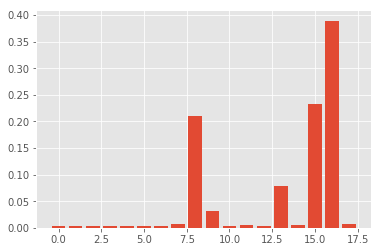

In [140]:
plt.bar(range(len(clf.feature_importances_)),clf.feature_importances_)

mean accuracy 0.979248 
std accuracy 0.005734 


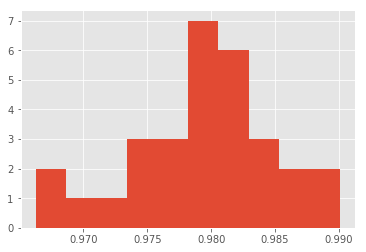

In [139]:
print "mean accuracy %f " %(cross_val_score(clf,X,y,cv=30).mean())
print "std accuracy %f " %(cross_val_score(clf,X,y,cv=30).std())
plt.hist(cross_val_score(clf,X,y,cv=30))
plt.show()

In [119]:
prob = pd.DataFrame(clf.predict_proba(X_test).tolist())
predict = clf.predict(X_test).tolist()
prob['predict'] = predict
prob['Y'] = y_test
call = prob[(prob['Y']==0) & (prob[1]>0)]
print "Usuarios que no han contratado pero cuya probabilidad de compra ha sido mayor que 0"
print call.shape
print call.head()
lista = call[1].values
data = [go.Histogram(x=lista)]
py.iplot(data, filename='basic histogram')

Usuarios que no han contratado pero cuya probabilidad de compra ha sido mayor que 0
(76, 4)
       0    1  predict  Y
1    0.4  0.6        1  0
12   0.8  0.2        0  0
65   0.2  0.8        1  0
85   0.0  1.0        1  0
175  0.4  0.6        1  0


In [120]:
# Ahora con dd_norm2

In [141]:
X = dd_norm2.values
y = Y.values

In [142]:
clf = RandomForestClassifier(oob_score=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf.fit(X_train,y_train)
print accuracy_score(y_test,clf.predict(X_test))

0.976473698123


<Container object of 17 artists>

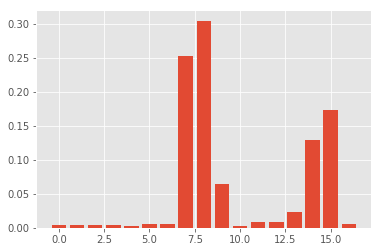

In [143]:
plt.bar(range(len(clf.feature_importances_)),clf.feature_importances_)

mean accuracy 0.978918 
std accuracy 0.006336 


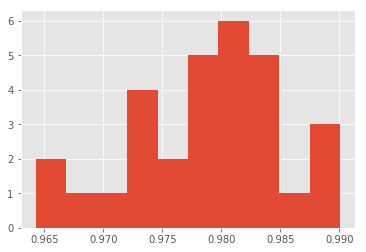

In [123]:
print "mean accuracy %f " %(cross_val_score(clf,X,y,cv=30).mean())
print "std accuracy %f " %(cross_val_score(clf,X,y,cv=30).std())
plt.hist(cross_val_score(clf,X,y,cv=30))
plt.show()

In [125]:
prob = pd.DataFrame(clf.predict_proba(X_test).tolist())
predict = clf.predict(X_test).tolist()
prob['predict'] = predict
prob['Y'] = y_test
call = prob[(prob['Y']==0) & (prob[1]>0)]
print "Usuarios que no han contratado pero cuya probabilidad de compra ha sido mayor que 0"
print call.shape
print call.head()
lista = call[1].values
data = [go.Histogram(x=lista)]
py.iplot(data, filename='basic histogram')

Usuarios que no han contratado pero cuya probabilidad de compra ha sido mayor que 0
(119, 4)
       0    1  predict  Y
10   0.9  0.1        0  0
68   0.3  0.7        1  0
111  0.7  0.3        0  0
121  0.9  0.1        0  0
194  0.2  0.8        1  0


(array([ 27.,   6.,   4.,   0.,  10.,   6.,  10.,  16.,  12.,  28.]),
 array([ 0.1 ,  0.19,  0.28,  0.37,  0.46,  0.55,  0.64,  0.73,  0.82,
         0.91,  1.  ]),
 <a list of 10 Patch objects>)

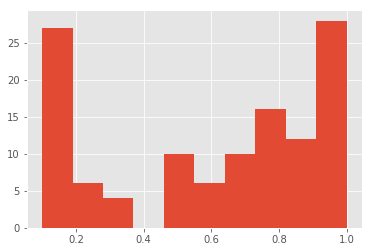

In [131]:
plt.hist(call[1])

In [120]:
# Ahora con dd_norm3

In [144]:
X = dd_norm3.values
y = Y.values

In [145]:
clf = RandomForestClassifier(oob_score=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf.fit(X_train,y_train)
print accuracy_score(y_test,clf.predict(X_test))

0.979117102828


<Container object of 17 artists>

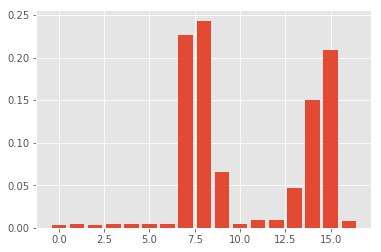

In [146]:
plt.bar(range(len(clf.feature_importances_)),clf.feature_importances_)

mean accuracy 0.978918 
std accuracy 0.006336 


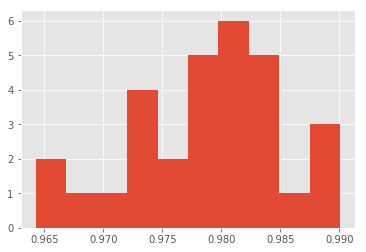

In [134]:
print "mean accuracy %f " %(cross_val_score(clf,X,y,cv=30).mean())
print "std accuracy %f " %(cross_val_score(clf,X,y,cv=30).std())
plt.hist(cross_val_score(clf,X,y,cv=30))
plt.show()

In [135]:
prob = pd.DataFrame(clf.predict_proba(X_test).tolist())
predict = clf.predict(X_test).tolist()
prob['predict'] = predict
prob['Y'] = y_test
call = prob[(prob['Y']==0) & (prob[1]>0)]
print "Usuarios que no han contratado pero cuya probabilidad de compra ha sido mayor que 0"
print call.shape
print call.head()
lista = call[1].values
data = [go.Histogram(x=lista)]
py.iplot(data, filename='basic histogram')

Usuarios que no han contratado pero cuya probabilidad de compra ha sido mayor que 0
(106, 4)
       0    1  predict  Y
19   0.0  1.0        1  0
49   0.0  1.0        1  0
66   0.7  0.3        0  0
248  0.1  0.9        1  0
293  0.3  0.7        1  0


(array([ 22.,   7.,   5.,   7.,   9.,   6.,  13.,   5.,  18.,  14.]),
 array([ 0.1 ,  0.19,  0.28,  0.37,  0.46,  0.55,  0.64,  0.73,  0.82,
         0.91,  1.  ]),
 <a list of 10 Patch objects>)

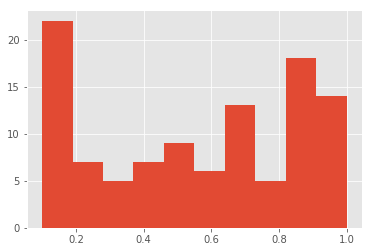

In [136]:
plt.hist(call[1])